# Triplespec Focus Calculator - Status Report
05 July 2022

By Simon Torres


## TL;DR.

The [TripleSpec Focus Calculator](https://github.com/soar-telescope/triplespec_focus) is well in advance, however I've been trying to improve one key aspect to make it super reliable, at least to the level required by its intended application. I tested all the parameters obtained using source detection tools but didn't get any of them to provide good results. As far as I understand the best parameter for finding the focus is the FWHM, but neither DAOStarFinder nor sextractor provide it. I tried fitting 2D gaussian to every detected source but it slowed the process from a couple of seconds to at least one minute. There is also the problem of the large focus range, which causes the star to appear almost as extended sources at the extreme of the range, so it naturally creates several spurious detections.

To solve these challenges I intend to find a way to get the FWHM with approximately the following sequence.

1. Find the optimal aperture for TSpec data.
2. Don't try to find the best focus right away after source detection but instead
  - Find the best image and
  - Choose a small but significant number of good stars to perform 2D PSF fitting. ('significant number' and 'good stars' to be defined.)
  - Also could do full photometry instead.
  - Apply some filtering and get one averaged FWHM values per image
  - Interpolate data (to be evaluated)
  - Find best focus and produce data for reporting or returning.


## Current Results

Currently the tool can provide a best focus value but as I say it across this document they are not good enough for moving to "production".

I followed the same approach as its goodman's equivalent. If run from a terminal it will print the result but if used as a library it will return a report as a JSON string.


Example of a terminal result:

```
Best Image: SV_ARC_13-04-2022_0022.fits
Best Focus Value: -1042.0
```

Example of a JSON string.

```json
[
    {
        "date": "<date in header>",
        "time": "<time in header>",
        "notes": "Useful for reporting special cases",
        "mean_focus": -1033.9232584305,
        "median_focus": -1031.7352546648,
        "focus_std": 12.3313386295,
        "best_image_name": "SV_ARC_13-04-2022_0022.fits",
        "best_image_focus": -1042.0,
        "focus_data": [
            -1059.0,
            -1042.0,
            -1002.0,
            -962.0,
            -949.0,
            -922.0
        ],
        "mag_data": [
            -0.816171584613748,
            -0.7511250790068043,
            -0.8105805029166375,
            -0.5527647902431749,
            -0.3940762886081871,
            -0.265602060499452
        ]
    }
]
```

## Current problems

One of the main issues is to obtain a reliable parameter for finding the best focused image, I'm testing two tools for obtaining photometry, one is photutils `DAOStarFinder` which is a clone from iraf's `daofind`([Stetson, 1987](https://ui.adsabs.harvard.edu/abs/1987PASP...99..191S/abstract)) and sextractor (See [Docs](https://sextractor.readthedocs.io/en/latest/Introduction.html)). Source detection itself is also a challenge. One reason is the large amount of cosmetic artifacts in TSpec Slit Viewer detector but not as important as the range in focus that causes some stars almost dissapear in the image.

### DAOStarFinder / parameters

Straight from the documentation, DAOStarFinder returns:

```
A table of found stars with the following parameters:
    id: unique object identification number.
    xcentroid, ycentroid: object centroid.
    sharpness: object sharpness.
    roundness1: object roundness based on symmetry.
    roundness2: object roundness based on marginal Gaussian fits.
    npix: the total number of pixels in the Gaussian kernel array.
    sky: the input sky parameter.
    peak: the peak, sky-subtracted, pixel value of the object.
    flux: the object flux calculated as the peak density in the convolved image divided by the           detection threshold. This derivation matches that of DAOFIND if sky is 0.0.
    mag: the object instrumental magnitude calculated as -2.5 * log10(flux). The derivation            matches that of DAOFIND if sky is 0.0.
    None is returned if no stars are found.
```


After a quick selection of parameters I plotted everything, the best behaved parameter is the magnitude but is still very noisy, probably due to the aperture not being the best (see below). and also the `DAOStarFinder` tool does not do proper photometry, but maybe doing photometry is overkill.
![all_parameters](./img/all_parameters.png)

In this image the FWHM is calculated using a formula provided by R. Cantarutti.

$FWHM=\frac{2.355 \times I_{Total}}{\sqrt(2 \pi) \times I_{Max}}$

Where $I_{Total}$ is the measured flux and $I_{Max}$ is the peak value.

One of the things that I haven't tried yet is to do an [aperture-growth test](https://github.com/soar-telescope/triplespec_focus/issues/7) such as in the image below.
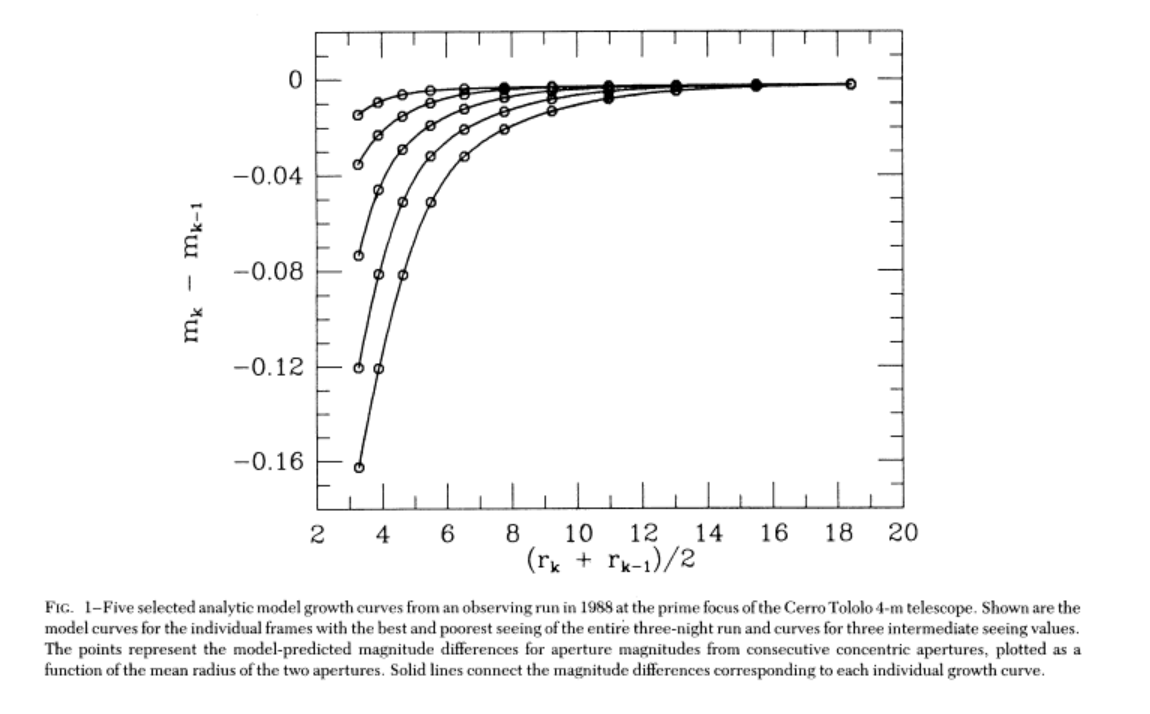

### Source Detection

These two images show extreme cases of good and bad source detections, this causes an uneven number of detections for the sources across the images. This might not be a problem actually but I wanted to mention it anyways.
![Good Source Detections](./img/good_detections.png)
![Bad Source Detections](./img/bad_detections.png)


### Sample Range

This image illustrates  the issue with the focus sampling range, though, for a focus calculator, defocused images are expected I believe there is room for improvement in defining a better range, unless the wide range is required.

![Sample Range](./img/all_profiles.png)